In [1]:
import matplotlib.pyplot as plt
import numpy as np

## SOEE3250/SOEE5675/SOEE5675M					2024/25

Inverse Theory

# Practical 2: Least squares estimation

## Geophysical background
A survey seismic refraction experiment has been carried out as shown in Figure 1. Your goal is to determine the seismic velocity (that is, the speed that seismic waves can travel) of the three different layers and the thickness of the upper two.

<img src="../Figures/Prac2_fig1.png" alt="drawing" style="width:400px;"/>
Figure 1. Seismic refraction survey set up.


We assume that for each layer, the seismic velocity successively increases.
At the geophones (the seismometers that measure the waves) closest to the source, the first arrivals are the direct waves that travel along the surface. In the middle distance, the first arrivals are the refracted waves that travel along the top of the middle layer, because the waves can travel through the middle layer (even with the descent and ascent of the wave) in less time than the direct surface wave takes. For a similar reason, at the farthest geophones, the first arrivals are refracted and travel along the top of the deepest layer (which has the fastest seismic velocity). A plot of first arrivals looks like Figure 2.

 
<img src="../Figures/Prac2_fig2.png" alt="drawing" style="width:400px;"/>
Figure 2. Time of first arrivals.

The slopes represent the “slowness” (reciprocal of velocity) of each layer. The intercepts with the y-axis are related to the velocities and the depths by the following formulae:

$\large \tau_1 = 2 z_1 \frac{ \sqrt{ c_2^2 - c_1^2}}{c_2 c_1}$

$\large \tau_2 = 2 z_1 \frac{ \sqrt{ c_3^2 - c_1^2}}{c_3 c_1} + 2 z_2 \frac{ \sqrt{ c_3^2 - c_2^2}}{c_3 c_2}$

where $z_1$ and $z_2$ are the thicknesses of the upper and middle layers, respectively, $c_1$ and $c_2$ are the corresponding velocities, and $c_3$ is the velocity of the bottom layer. The locations and measured first arrival times are given in Table 1.

| Distance (m)   | First arrival time (s)  |  
| :------ |---------:|
|  80 | 0.0474 |
|  160 | 0.0979 |
| 240 | 0.1481 | 
| 320 | 0.1949 |
| 400 | 0.2288 | 
| 480 | 0.2563 |
| 560 | 0.2819 |
| 640 | 0.3108 |
| 720 | 0.3325 |
| 800 | 0.3529 |
| 880 | 0.3694 |

Table 1. Distance from source and time of first arrival, for each receiver.

The first four measurements are related to the speed of waves in the upper layer; the second four to the middle layer; and the remaining 3 to the bottom layer.

## Mathematical background

This practical is essentially about fitting least-squares straight lines through three groups of data: points $1-4$, $5-8$, $9-11$.

<img src="../Figures/Prac2_fig3.png" alt="drawing" style="width:500px;"/>

- The first straightline segment (blue), with zero intercept, has a gradient related to $c_1$. 
- The second straightline (orange) has intercept $\tau_1$ and a gradient related to $c_2$.
- The third straightline (purple) has intercept $\tau_2$ and a gradient related to $c_3$.

Using the formulae given above, the layer depths $z_1$ and $z_2$ can be calculated.



Q1) What is the data vector in this problem, and what are the overall model parameters? 

The data vector is the arrival times; the model parameters are $c_1$, $c_2$, $c_3$, $z_1$, $z_2$.

Q2) Define a vector of arrival times and a vector of distances. Make a plot of arrival time versus distance for the observations. Add a title and label the axes. 

In [3]:
#plt.figure()
#plt.plot(x,y 'o',color='red')
#plt.ylabel('')
#plt.xlabel('');
#plt.title('My title')

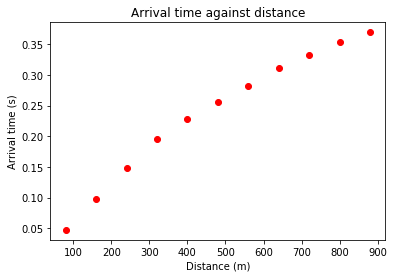

In [3]:
d = np.array([0.0474, 0.0979, 0.1481, 0.1949, 0.2288, 0.2563, 0.2819, 0.3108, 0.3325, 0.3529, 0.3694])
distance = np.array([80, 160, 240, 320, 400, 480, 560, 640, 720, 800, 880]) 
plt.figure()
plt.plot(distance, d, 'o',color='red')
plt.ylabel('Arrival time (s)')
plt.xlabel('Distance (m)');
plt.title('Arrival time against distance');

Q3) The measurements at the first 4 geophones relate to the upper layer. Using markdown, write down the equations that relates the velocity of the upper layer, $c_1$, to these 4 measurements (in the format $d_i=\dots$). For the upper layer, what are the unknown parameters ($m_i$)? Is the problem linear (i.e., is $d_i$ the weighted sum of the unknown parameter(s))?


A3) 
$d_1= distance_1/c_1$  

$d_2= distance_2/c_1$

$d_3= distance_3/c_1$

$d_4= distance_4/c_1$

The only unknown parameter for the upper layer is $c_1$.
The data depend non-linearly on the velocity $c_1$.

Q4) Now rewrite the equations using slowness of the upper layer, $s_1$ (where $s_1=1/c_1$), instead of velocity. Is the system now linear?

A4) 
$d_1= distance_1 s_1$  

$d_2= distance_2 s_1$

$d_3= distance_3 s_1$

$d_4= distance_4 s_1$

The data now depend linearly on the unknown slowness $s_1$.

Q5) Set up a vector of observations for the upper layer $d1$ and a forward operator matrix ($G1$) based on the equations you wrote down above. 
The columns of $G1$ should correspond to the multipliers of $m_i$.

In [ ]:
d1 = 
G1 = np.zeros((4,1))  #setup G1 as a matrix of zeros
G1[0:4,0] =   #set values here.


In [4]:
d1 = d[0:4]
G1 = np.zeros((4,1))
G1[0:4,0] = distance[0:4]


Q6) Use least squares to estimate $s_1$, and then calculate $c_1$ from $s_1$. What are the units of $c_1$? As a check, you should get 1635.9. 

Recall: the matrix inverse can be found using np.linalg.inv(), the transpose of A is A.transpose(), and the product of matrices A and B can be written as A @ B.

In [5]:
s1hat = np.linalg.inv ( G1.transpose() @ G1 ) @ G1.transpose() @ d1 
c1hat = 1/s1hat
print(c1hat)
print('An estimate of speed c1 is {0:.2f} m/s'.format(float(c1hat)) )

[1635.88030809]
An estimate of speed c1 is 1635.88 m/s


Q7) Copy and paste the plotting code from your answer to Q2 into the cell below. To this plot add a line (in a different colour), based on your estimated value of $s_1$. 
Does it look visually like you have found the least squares solution to the straight line fit of the first four data points?

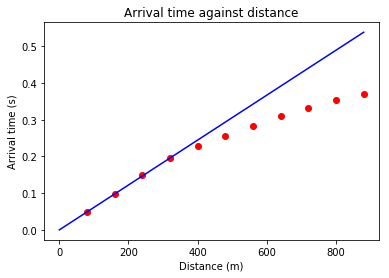

In [6]:
d = np.array([0.0474, 0.0979, 0.1481, 0.1949, 0.2288, 0.2563, 0.2819, 0.3108, 0.3325, 0.3529, 0.3694])
a = np.array([80, 160, 240, 320, 400, 480, 560, 640, 720, 800, 880]) #distance
plt.figure()
plt.plot(distance, d, 'o',color='red')
plt.ylabel('Arrival time (s)')
plt.xlabel('Distance (m)');
plt.title('Arrival time against distance');
x = np.linspace(0,880,1000)
y = s1hat * x
plt.plot(x,y,'-',color='blue');


Q8) The middle layer is defined the next 4 geophones. Write down the equation that relates the slowness of the middle layer ($s_2$) and the intercept ($\tau_1$) to the measurements at the next 4 geophones (in the format $d_i=\dots$). 
What are the unknown parameters ($m_i$)?

$d_i= distance_i s_2 + \tau_1$, $i=5,6,7,8$.

The unknown parameters are $s_2$ and $\tau_1$.

Q9) Set up a vector of observations ($d2$) for the middle layer and a forward operator matrix ($G2$) based on the equations above. Use least squares to estimate $s_2$ (and therefore $c_2$) and $\tau_1$.  As a check, the value for $c_2$ should be about 2946 m/s.

In [7]:
d2 = d[4:8]
G2 = np.zeros((4,2))
G2[0:4,0] = [1,1,1,1]
G2[0:4,1] = distance[4:8]
mhat = np.linalg.inv ( G2.transpose() @ G2 ) @ G2.transpose() @ d2  #mhat = [tau_1, s_2] 
c2hat = 1/mhat[1]
tau1hat = mhat[0]
print('An estimate of speed c2 is {0:.2f} m/s'.format(float(c2hat)) )

An estimate of speed c2 is 2945.51 m/s


Q10) Copy and paste your plotting code from Q7 and add a line to the plot, in a different colour, based on your estimates for the middle layer. 

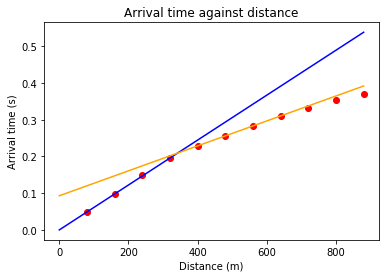

In [9]:
plt.figure()
plt.plot(distance, d, 'o',color='red')
plt.ylabel('Arrival time (s)')
plt.xlabel('Distance (m)');
plt.title('Arrival time against distance');
x = np.linspace(0,880,1000)
y = s1hat * x
plt.plot(x,y,'-',color='blue');
x = np.linspace(0,880,1000)
y = x / c2hat + tau1hat
plt.plot(x,y,'-',color='orange');

Q11) What is the estimated thickness of the upper layer ($z_1$)? 

A11) Using the formula $\tau_1 = 2 z_1 \frac{ \sqrt{ c_2^2 - c_1^2}}{c_2 c_1}$

In [10]:
z1hat = tau1hat/2  * (c2hat * c1hat) / np.sqrt( c2hat**2 - c1hat**2) 

print('An estimate of depth z1 is {0:.2f} m'.format(float(z1hat)) )

An estimate of depth z1 is 91.38 m


Q12) The remaining 3 geophones constrain the bottom layer. Now estimate the velocity of the bottom layer ($c_3$) and the thickness of the middle layer ($z_2$) using least squares, and add an appropriate third line to your plot. As a check, the value for $c_3$ should be 4336 m/s, and the depth $z_2$ should be 127.7m.


An estimate of speed c3 is 4336.04 m/s


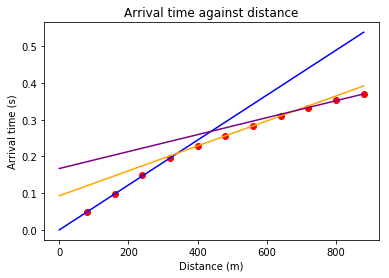

In [13]:
d3 = d[8:12]
G3 = np.zeros((3,2))
G3[0:4,0] = [1,1,1]
G3[0:4,1] = distance[8:11]
mhat = np.linalg.inv ( G3.transpose() @ G3 ) @ G3.transpose() @ d3  #mhat = [tau_2, s_3] 
c3hat = 1/mhat[1]
tau2hat = mhat[0]
print('An estimate of speed c3 is {0:.2f} m/s'.format(float(c3hat)) )

plt.figure()
plt.plot(distance, d, 'o',color='red')
plt.ylabel('Arrival time (s)')
plt.xlabel('Distance (m)');
plt.title('Arrival time against distance');
x = np.linspace(0,880,1000)
y = s1hat * x
plt.plot(x,y,'-',color='blue');
x = np.linspace(0,880,1000)
y = x / c2hat + tau1hat
plt.plot(x,y,'-',color='orange');
y = x / c3hat + tau2hat
plt.plot(x,y,'-',color='purple');


Using the formula $ \tau_2 = 2 z_1 \frac{ \sqrt{ c_3^2 - c_1^2}}{c_3 c_1} + 2 z_2 \frac{ \sqrt{ c_3^2 - c_2^2}}{c_3 c_2}$


In [14]:
z2hat = (tau2hat - 2 * z1hat * np.sqrt( c3hat**2 - c1hat**2)/(c3hat * c1hat))/2*(c3hat * c2hat)/np.sqrt( c3hat**2 - c2hat**2)
print('An estimate of depth z2 is {0:.2f} m'.format(float(z2hat)) )

An estimate of depth z2 is 127.70 m
